In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

In [3]:
mnist = fetch_openml('mnist_784', version=1)

In [111]:
type(mnist)

sklearn.utils.Bunch

In [7]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [51]:
x, y = mnist["data"].values, mnist["target"].values

In [56]:
np.shape(x)

(70000, 784)

In [53]:
y = y.astype(np.float64)

In [55]:
np.shape(y)

(70000,)

3.0


<function matplotlib.pyplot.show(close=None, block=None)>

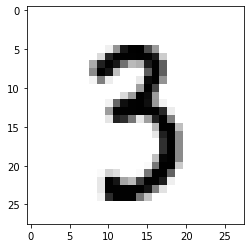

In [113]:
n=98
plt.imshow(x[n].reshape(28, 28), cmap="binary")
print(y[n])
plt.show

In [59]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [60]:
x_test.shape

(21000, 784)

In [61]:
y_train_5 = (y_train==5)

In [62]:
np.size(y_train_5)

49000

In [76]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier()
sgd_clf.fit(x_train,y_train_5)

SGDClassifier()

True
[ True]


<function matplotlib.pyplot.show(close=None, block=None)>

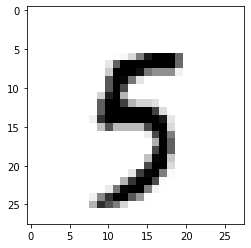

In [77]:
n=16
plt.imshow(x_train[n].reshape(28, 28), cmap="binary")
print(y_train_5[n])
print(sgd_clf.predict([x_train[n]]))
plt.show

In [79]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, x_train, y_train_5, cv=3, scoring="accuracy")

array([0.95794049, 0.96424417, 0.95040715])

In [80]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, sgd_clf.predict(x_train))


array([[43776,   835],
       [  804,  3585]], dtype=int64)

In [81]:
from sklearn.metrics import precision_score, recall_score
y_train_predict = sgd_clf.predict(x_train)

In [82]:
precision_score(y_train_5, y_train_predict)

0.8110859728506787

In [83]:
recall_score(y_train_5, y_train_predict)

0.8168147641831852

In [84]:
from sklearn.metrics import classification_report

In [87]:
print(classification_report(y_train_5, y_train_predict))

              precision    recall  f1-score   support

       False       0.98      0.98      0.98     44611
        True       0.81      0.82      0.81      4389

    accuracy                           0.97     49000
   macro avg       0.90      0.90      0.90     49000
weighted avg       0.97      0.97      0.97     49000



In [89]:
sgd_clf.fit(x_train, y_train)

SGDClassifier()

9.0
[9.]


<function matplotlib.pyplot.show(close=None, block=None)>

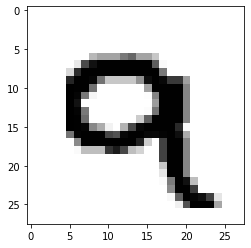

In [96]:
n=987
plt.imshow(x_train[n].reshape(28, 28), cmap="binary")
print(y_train[n])
print(sgd_clf.predict([x_train[n]]))
plt.show

In [99]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, x_train, y_train, cv=3)

In [100]:
y_train_pred

array([2., 3., 8., ..., 4., 5., 6.])

In [102]:
conf_mx = confusion_matrix(y_train, y_train_pred)
print(conf_mx)

[[4520    1   43   52   10  114   58    5   75   25]
 [   1 5226   47   16    5   27   15   12   74   24]
 [  35   57 4129  107   43   58  176   64  176   27]
 [  21   21  138 4235   11  213   28   51  137  102]
 [  23   18   33   40 4146   30   63   28   67  310]
 [  44   17   34  196   46 3681  124   28  138   81]
 [  37   18  106   43   34  100 4441    5   31    3]
 [  16   27   75   43   38   26    7 4680   44  219]
 [  34  107  173  306   36  438   60   17 3457  163]
 [  24   15   23  175  143   80    1  245   57 4127]]


In [104]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.92      0.94      4903
         1.0       0.95      0.96      0.95      5447
         2.0       0.86      0.85      0.85      4872
         3.0       0.81      0.85      0.83      4957
         4.0       0.92      0.87      0.89      4758
         5.0       0.77      0.84      0.80      4389
         6.0       0.89      0.92      0.91      4818
         7.0       0.91      0.90      0.91      5175
         8.0       0.81      0.72      0.76      4791
         9.0       0.81      0.84      0.83      4890

    accuracy                           0.87     49000
   macro avg       0.87      0.87      0.87     49000
weighted avg       0.87      0.87      0.87     49000



<AxesSubplot:>

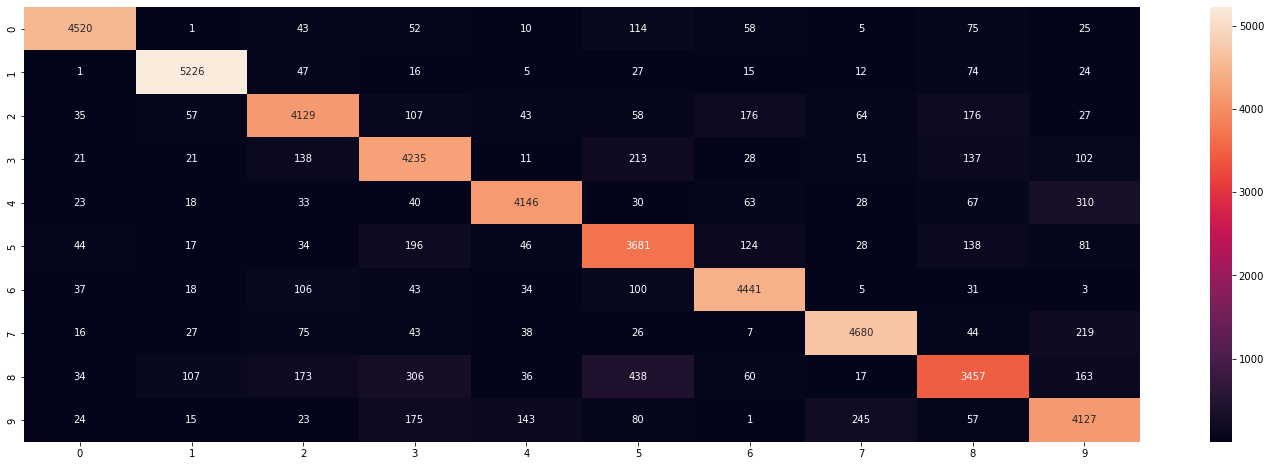

In [110]:
fig, ax = plt.subplots(figsize=(25,8))
sns.heatmap(conf_mx, annot=True, fmt=".0f")

In [116]:
preds = sgd_clf.predict(x_test)

In [124]:
from sklearn.metrics import mean_squared_error
final_mse = mean_squared_error(y_test, preds)
final_rmse = np.sqrt(final_mse)

In [125]:
final_mse

1.8675238095238096

In [126]:
final_rmse

1.3665737482930842

In [137]:
c = (preds == y_test)
dfc = pd.DataFrame(c)
dfc.value_counts()

True     18386
False     2614
dtype: int64